<a href="https://colab.research.google.com/github/kayodeolusanya/Peterside-Hospital-Heart-Disease-ML-Project/blob/main/Peterside_Hospital_Heart_Disease_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import Libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# ! pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load dataset
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# For better understanding and flow of analysis, I will rename some of the columns
df.columns = ['age','sex','chest_pain_type', 'resting_blood_pressure','cholesterol','fasting_blood_sugar', 'rest_ecg', 
              'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 
              'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [8]:
# Statistical Analysis of the data
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<Axes: >

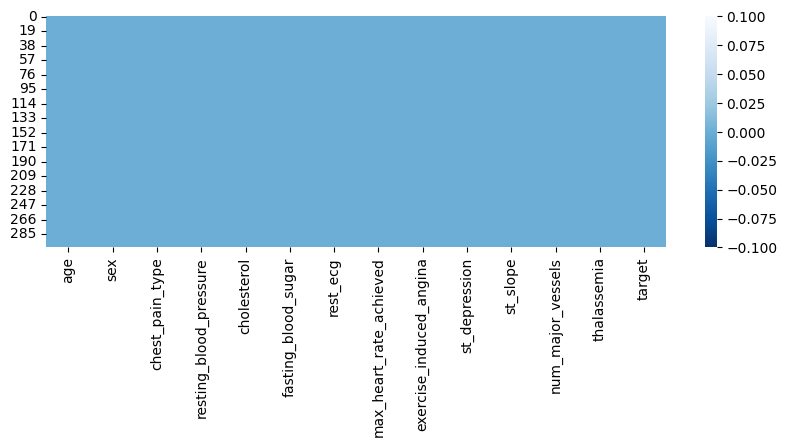

In [9]:
# Check for missing values
print(df.isnull().sum())

# Visualising the missing data
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar= True, cmap= "Blues_r")

###Exploratory Data Analysis
####Univariate Analysis

In [10]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

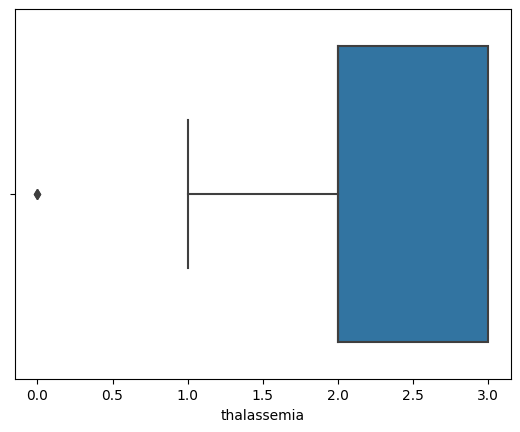

In [11]:
# Check for outliers
sns.boxplot(x=df["thalassemia"]);

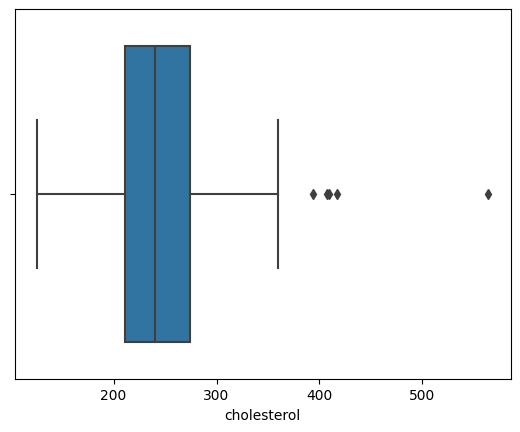

In [12]:
# Check for outliers
sns.boxplot(x=df["cholesterol"]);

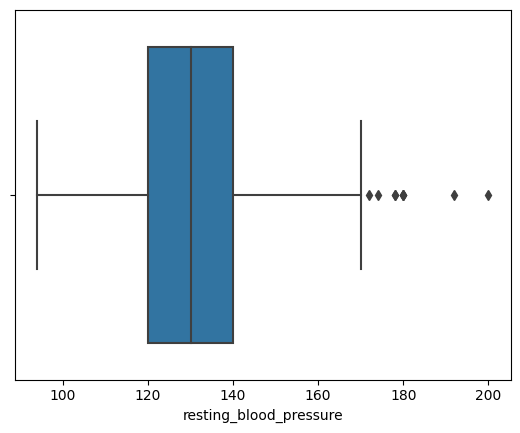

In [13]:
# Check for outliers
sns.boxplot(x=df["resting_blood_pressure"]);

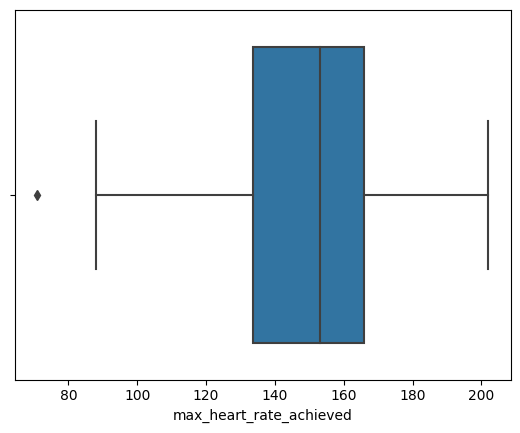

In [14]:
# Check for outliers
sns.boxplot(x=df["max_heart_rate_achieved"]);

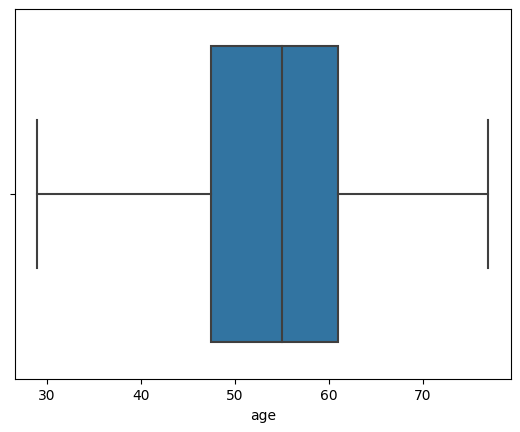

In [15]:
# Check for outliers
sns.boxplot(x=df["age"]);

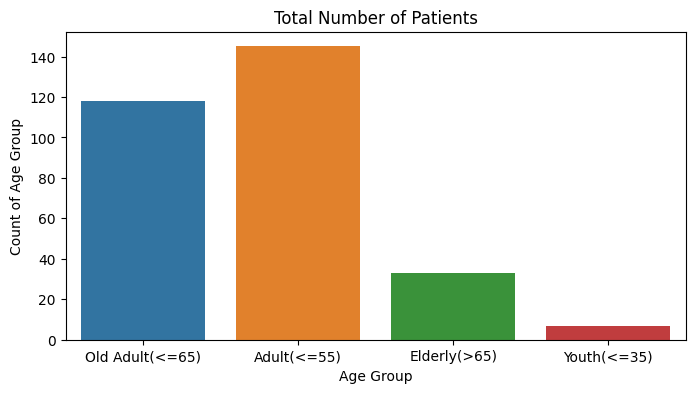

In [16]:
# Create an Age bracket column
def age_bracket(age):
  if age <= 35:
    return "Youth(<=35)"
  elif age <= 55:
    return "Adult(<=55)"
  elif age <= 65:
    return "Old Adult(<=65)"
  else:
    return "Elderly(>65)"

df['age_bracket'] = df['age'].apply(age_bracket)

# Investigating the age group of patients
plt.figure(figsize= (8,4))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients');

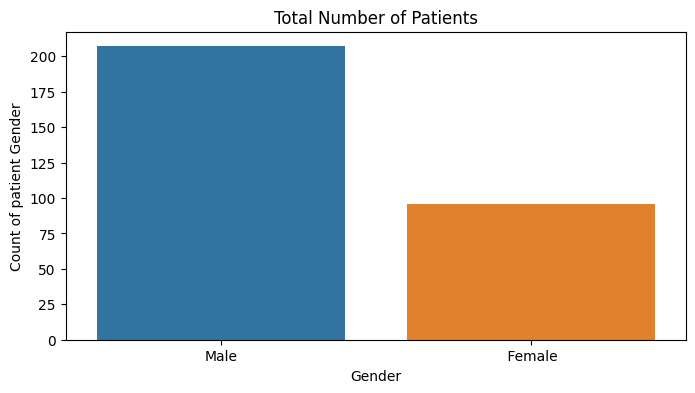

In [17]:
#Create a visualization for sex
def gender(sex):
  if sex==1:
    return "Male"
  else:
    return " Female"

df['gender'] = df['sex'].apply(gender)

plt.figure(figsize= (8,4))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients');

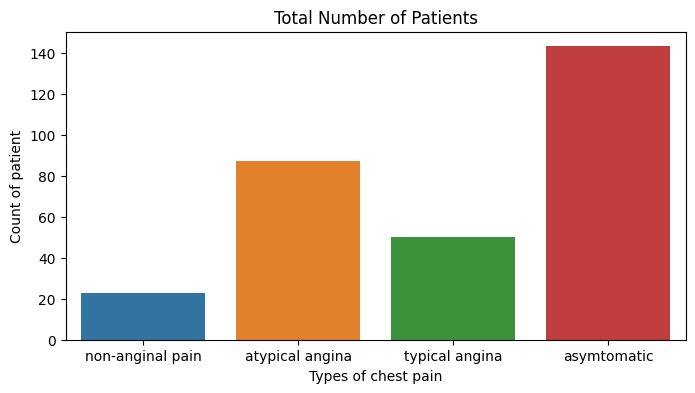

In [18]:
#Create a visualization for Chest Pain type
# Chest pain type (1:typical angina, 2: atypical angina, 3:non-anginal pain, 4:asymptomatic)
def chest_pain(cp):
  if cp==1:
    return "typical angina"
  elif cp==2:
    return "atypical angina"
  elif cp==3:
    return "non-anginal pain"
  else:
    return "asymtomatic"

df['cp_cat']= df['chest_pain_type'].apply(chest_pain)

plt.figure(figsize= (8,4))
sns.countplot(x='cp_cat', data=df)
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient')
plt.title('Total Number of Patients');

Yes    165
No     138
Name: label, dtype: int64


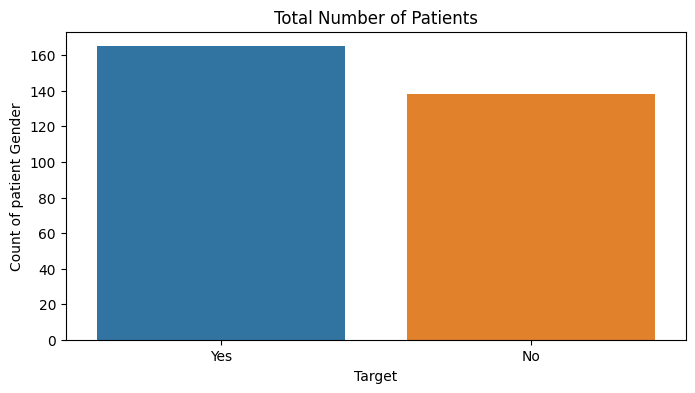

In [19]:
# Data Visualization
# target - have disease or not (1=yes, 0=no)
def label(tg):
  if tg==1:
    return "Yes"
  else:
    return "No"

df['label']= df['target'].apply(label)

# Total patient in each category
print(df['label'].value_counts())

# Investigating the gender of patients
plt.figure(figsize = (8,4))
sns.countplot(x='label', data=df)
plt.xlabel('Target')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients');

###Bivariate Analysis

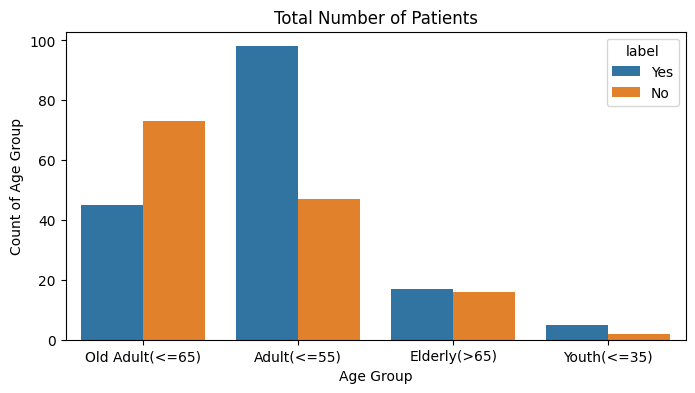

In [20]:
# Investigating the age group of patients by the target feature
plt.figure(figsize =(8,4))
sns.countplot(x='age_bracket', data=df, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients');

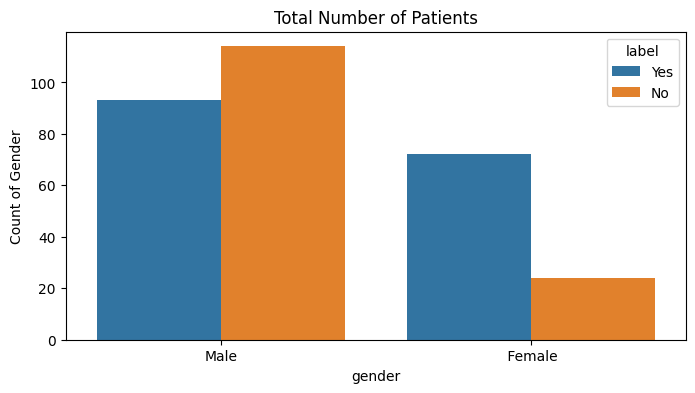

In [21]:
# Investigating the gender of patients by the target feature
plt.figure(figsize =(8,4))
sns.countplot(x='gender', data=df, hue='label')
plt.xlabel('gender')
plt.ylabel('Count of Gender')
plt.title('Total Number of Patients');

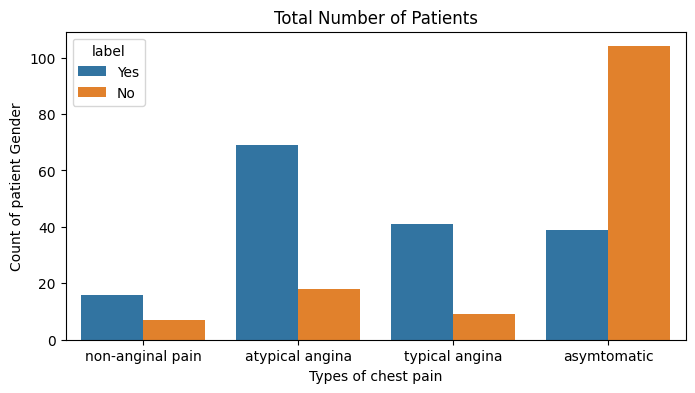

In [22]:
# Investigating the gender of patients by the Chest pain type
plt.figure(figsize =(8,4))
sns.countplot(x='cp_cat', data=df, hue='label')
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients');

###Multivariate Analysis

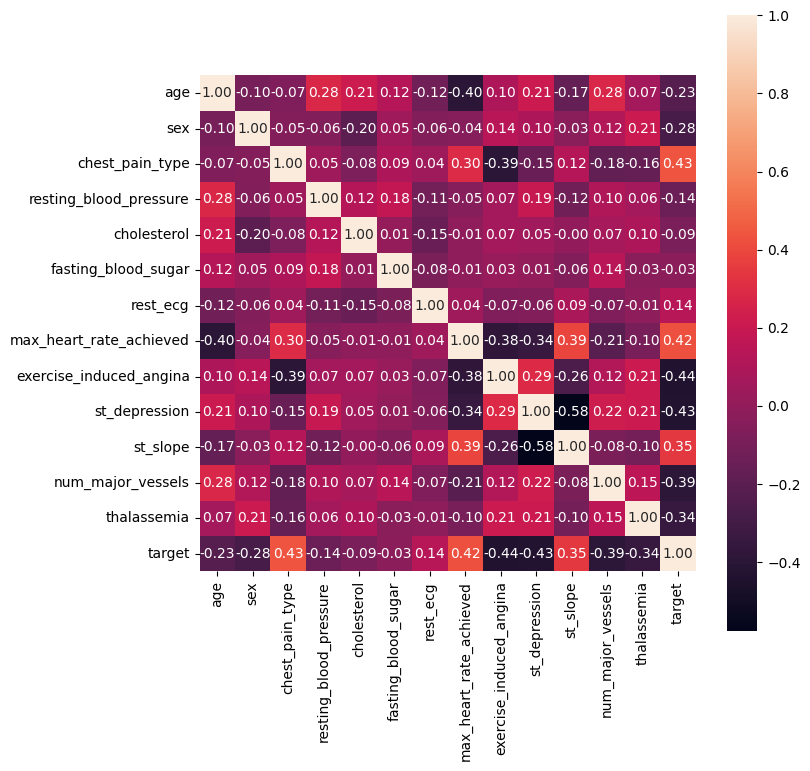

In [23]:
#  Correlation between variables in the dataset
plt.figure(figsize=(8,8))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10})

###Data Preprocessing and Feature Engineering

In [30]:
# Created a new copy of the data ( Excluded the target/label alongside other columns that was created)
df1 = df[['age','sex','chest_pain_type', 'resting_blood_pressure','cholesterol','fasting_blood_sugar', 'rest_ecg', 
              'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 
              'thalassemia']]
label = df[['target']]

In [34]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [36]:
# Dealing with Outliers - 'resting_blood_pressure', 'cholesterol', 'thalassemia','max_heart_rate_achieved'

# Normalizing the data
scaler = MinMaxScaler()

df1["Scaled_RBP"] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1,1))
df1["Scaled_chol"] = scaler.fit_transform(df1['cholesterol'].values.reshape(-1,1))
df1["Scaled_thal"] = scaler.fit_transform(df1['thalassemia'].values.reshape(-1,1))
df1["Scaled_max_heart_rate"] = scaler.fit_transform(df1['max_heart_rate_achieved'].values.reshape(-1,1))

df1.drop(['resting_blood_pressure','cholesterol','thalassemia','max_heart_rate_achieved'], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


###Machine Learning

In [ ]:
# Spliting the dataset into trainning and testing sets

X_train, X_test, y_train,y_test = train_test_split(df1, label, test_size=0.2, random_state=42)